In [1]:
import pandas as pd

import numpy as np


from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate



from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import GridSearchCV


import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

from sklearn.tree import DecisionTreeRegressor

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,roc_auc_score

import numpy as np;
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn import linear_model


Using TensorFlow backend.


In [2]:
df_tri=pd.read_csv('train.csv')

In [11]:
df_tri.head(2)

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,1,0.135370,0.45185,0.31162,2.0469,10.2340,0.16768,0.167630,1.2131,2.2554,...,0.078728,0.24695,0.92586,0.18362,9.0895,8.8342,48.172,7.5770,5.7725,0
1,2,0.005861,0.39858,0.19768,1.9390,9.5771,0.00000,0.007237,1.5089,0.9788,...,0.269720,0.00000,0.79303,0.31271,6.2213,4.2785,78.499,4.6497,1.6539,0


In [3]:
df_tei=pd.read_csv('test.csv')

In [13]:
df_tei.head(2)

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,36554,0.20055,0.37951,0.396410,2.0472,32.351,0.38825,0.249760,1.33050,1.1389,...,348690.0000,0.12196,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,36555,0.00902,0.63202,0.053735,1.1263,-37.842,0.00000,0.014434,0.58223,1.3332,...,1.1263,0.18011,0.024512,0.84165,0.340940,9.9665,4.2382,116.500,3.1330,2.5603


In [14]:
df_tri['target'].value_counts()

0    29772
1     1511
Name: target, dtype: int64

#### OBSERVATION: As we can see here this is highly imbalance dataset: 

In [16]:
yees=df_tri['target']
df_tr_after_drop=df_tri.drop(['target'],axis=1)

# Splitting DATA into Train Test and C.V with stratification in 49:30:21 ratio:

In [17]:
# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(df_tr_after_drop, yees, test_size=0.3, random_state=42,stratify=yees)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)


### Replacing NaN  with mean value of feature:

In [18]:
X_tr.fillna(X_tr.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
X_cv.fillna(X_cv.mean(), inplace=True)


### Standardisation of data:

In [19]:
sc = StandardScaler(with_mean=True)
Xbow_tr_std = sc.fit_transform(X_tr)
Xbow_test_std = sc.transform(X_test)
Xbow_cv_std = sc.transform(X_cv)

df_tei1 = sc.fit_transform(df_tei)
df_tri1 = sc.transform(df_tr_after_drop)

C:\Users\all\AppData\Local\conda\conda\envs\tf\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\all\AppData\Local\conda\conda\envs\tf\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\all\AppData\Local\conda\conda\envs\tf\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\all\AppData\Local\conda\conda\envs\tf\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.pa

# HYPER_PARAMETER TUNING WITH DEPTH AND NO.OF ESTIMATERS OF DECISION TREE:

In [21]:
#code for hyperparameter tuning
import numpy as np
hyper1 =  [5, 10, 50, 100, 200,400, 600, 800]
hyper2 =  [2, 4, 6, 8, 10, 12, 14, 16, 18]

auc1=np.empty((8,9))
auc2=np.empty((8,9))
l=0
for j in hyper1:
    m=0
    for k in hyper2:
        
        model = RandomForestClassifier(n_estimators=j,max_depth=k)
        model.fit(Xbow_tr_std, y_tr)
    
        probs = model.predict_proba(Xbow_tr_std)
        preds = probs[:,1]
        roc_auc1=metrics.roc_auc_score(y_tr, preds)
        auc1[l][m]=(roc_auc1)
    
  
        probs = model.predict_proba(Xbow_cv_std)
        preds = probs[:,1]
        roc_auc2=metrics.roc_auc_score(y_cv, preds)
        auc2[l][m]=(roc_auc2)
        m=m+1
        
    l=l+1

# PLOTTING SEABORN HEATMAP:

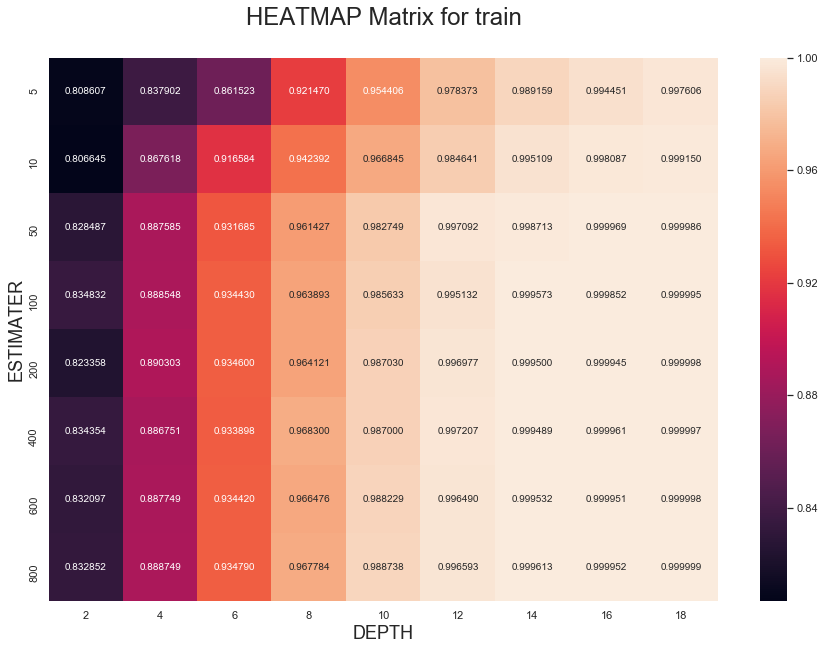

In [22]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc1, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for train\n",size=24)
plt.show()

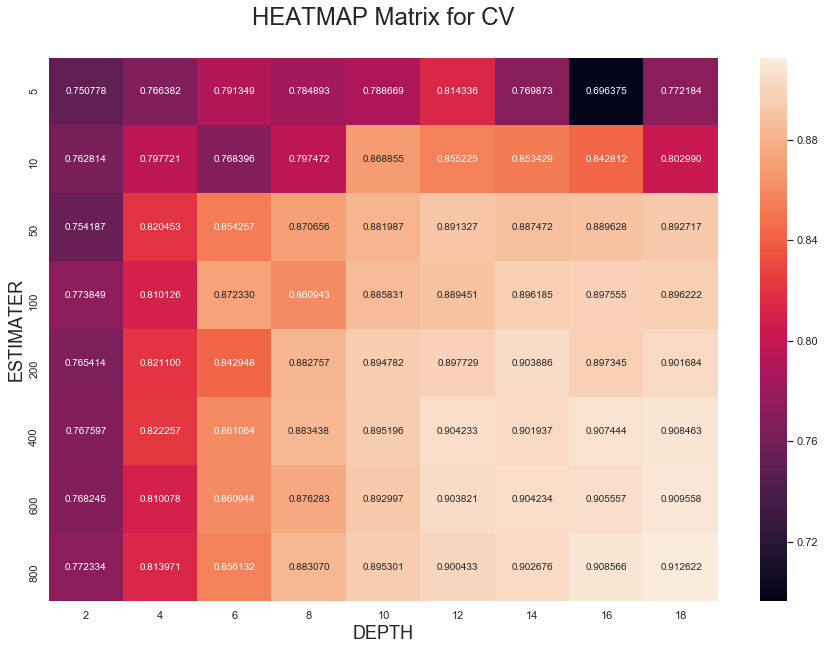

In [23]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc2, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for CV\n",size=24)
plt.show()

# FITTING AND TESTING MODEL ON OUR SPLITTED TEST DATA:

In [24]:
rf = RandomForestClassifier(n_estimators=50,max_depth=8)

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred = rf.predict(Xbow_test_std)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100

precision_score1=precision_score(y_test, pred )

recall_score1=recall_score(y_test, pred )
f1 = f1_score(y_test, pred)


print('\nThe accuracy of the Random forest classifier for n_estimaters=%f and Depth = %f is %f%%' % (50,8, acc))



print('\nThe precision_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (50,8,precision_score1))

print('\nThe recall_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (50,8,recall_score1))

print('\nThe f1_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (50,8,f1))



The accuracy of the Random forest classifier for n_estimaters=50.000000 and Depth = 8.000000 is 95.279702%

The precision_score of the  Random forest classifier  for n_estimaters=50 and Depth = 8 is 1.000000

The recall_score of the  Random forest classifier  for n_estimaters=50 and Depth = 8 is 0.022075

The f1_score of the  Random forest classifier  for n_estimaters=50 and Depth = 8 is 0.043197


# PLOTTING CONFUSION MATRIX:

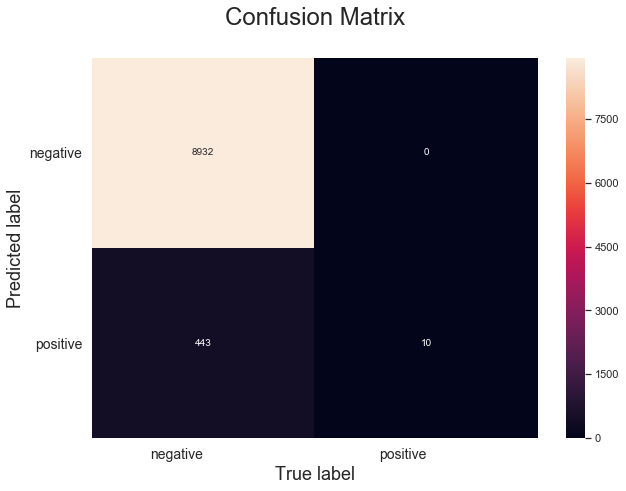

In [25]:
# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=18)
plt.xlabel('True label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

# PLOTTING AUC_ROC CURVE FOR TRAIN AND TEST DATA:

In [26]:
rf.fit(Xbow_tr_std, y_tr)
probs2 = rf.predict_proba(Xbow_tr_std)
preds2 = probs2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_tr, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)


probs1 = rf.predict_proba(Xbow_test_std)
preds1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

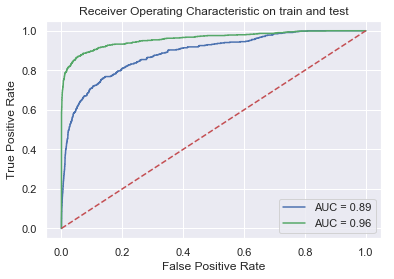

In [27]:
plt.title('Receiver Operating Characteristic on train and test')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'AUC = %0.2f' % roc_auc2)
#plt.plot(neighbors, auc1,'g')
#plt.plot(neighbors, auc2,'r')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# HYPERPARAMETER TUNING WITH DEPTH AND NO.OF ESTIMATERS for          XGBClassifier

In [28]:
#code for hyperparameter tuning
import numpy as np
hyper1 =  [5, 10, 50, 100, 200,400, 600, 800]
hyper2 =  [2, 4, 6, 8, 10, 12, 14, 16, 18]

auc1=np.empty((8,9))
auc2=np.empty((8,9))
l=0
for j in hyper1:
    m=0
    for k in hyper2:
        
        model = XGBClassifier(n_estimators=j,max_depth=k)
        model.fit(Xbow_tr_std, y_tr)
    
        probs = model.predict_proba(Xbow_tr_std)
        preds = probs[:,1]
        roc_auc1=metrics.roc_auc_score(y_tr, preds)
        auc1[l][m]=(roc_auc1)
    
  
        probs = model.predict_proba(Xbow_cv_std)
        preds = probs[:,1]
        roc_auc2=metrics.roc_auc_score(y_cv, preds)
        auc2[l][m]=(roc_auc2)
        m=m+1
        
    l=l+1

# PLOTTING SEABORN HEATMAP:

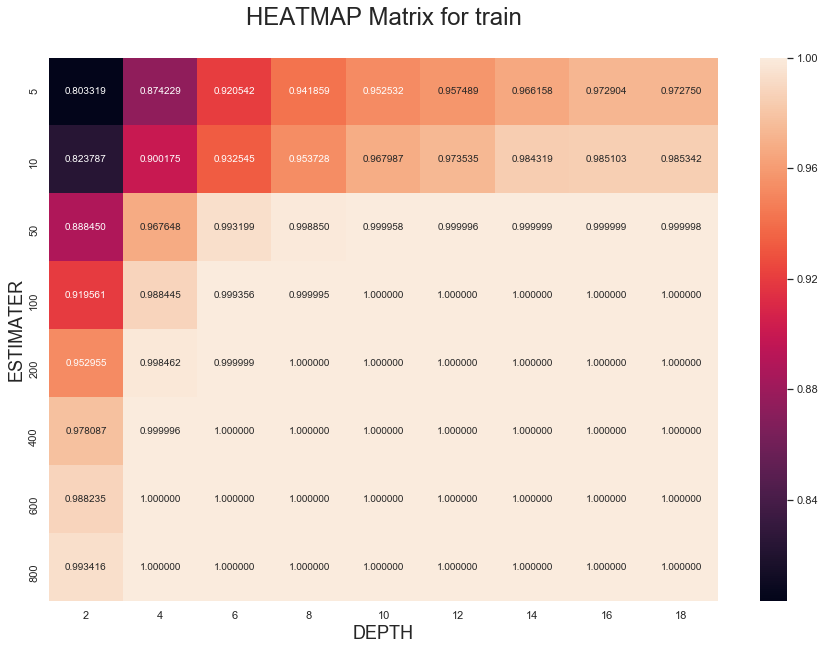

In [29]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc1, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for train\n",size=24)
plt.show()

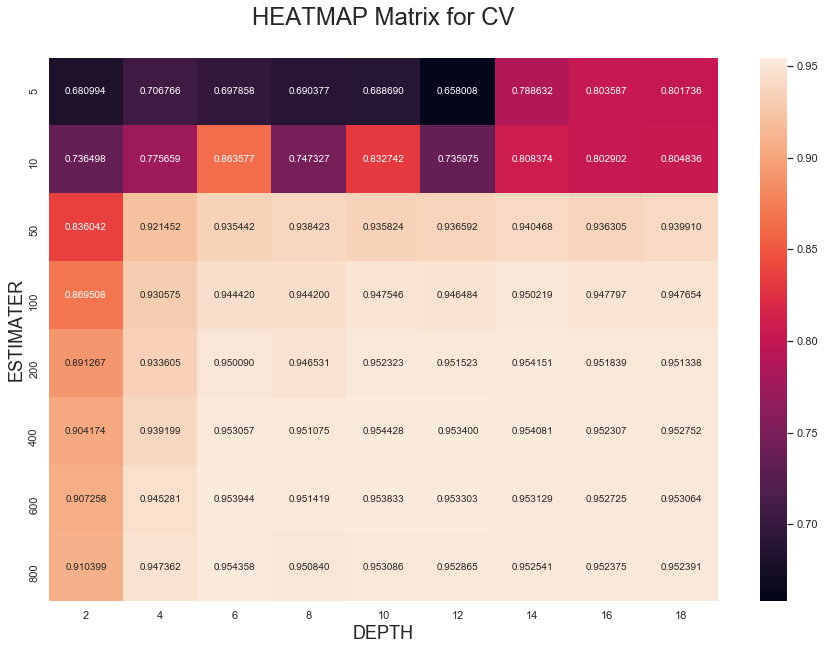

In [30]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc2, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for CV\n",size=24)
plt.show()

# FITTING AND TESTING MODEL ON OUR SPLITTED TEST DATA:

In [34]:
rf = RandomForestClassifier(n_estimators=50,max_depth=8)

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred = rf.predict(Xbow_test_std)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100

precision_score1=precision_score(y_test, pred )

recall_score1=recall_score(y_test, pred )

f1 = f1_score(y_test, pred)

print('\nThe accuracy of the Random forest classifier for n_estimaters=%f and Depth = %f is %f%%' % (50,8, acc))


print('\nThe precision_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (50,8,precision_score1))

print('\nThe recall_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (50,8,recall_score1))

print('\nThe f1_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (50,8,f1))



The accuracy of the Random forest classifier for n_estimaters=50.000000 and Depth = 8.000000 is 95.364944%

The precision_score of the  Random forest classifier  for n_estimaters=50 and Depth = 8 is 0.950000

The recall_score of the  Random forest classifier  for n_estimaters=50 and Depth = 8 is 0.041943

The f1_score of the  Random forest classifier  for n_estimaters=50 and Depth = 8 is 0.080338


# PLOTTING CONFUSION MATRIX:

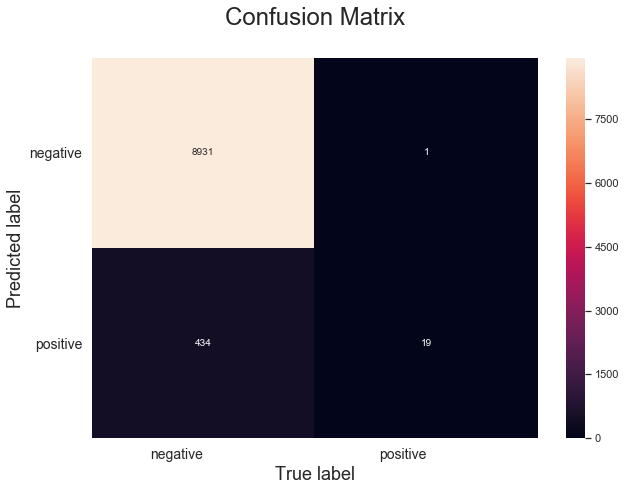

In [35]:
# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=18)
plt.xlabel('True label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

# PLOTTING AUC_ROC CURVE FOR TRAIN AND TEST DATA

In [36]:
rf.fit(Xbow_tr_std, y_tr)
probs2 = rf.predict_proba(Xbow_tr_std)
preds2 = probs2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_tr, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)


probs1 = rf.predict_proba(Xbow_test_std)
preds1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

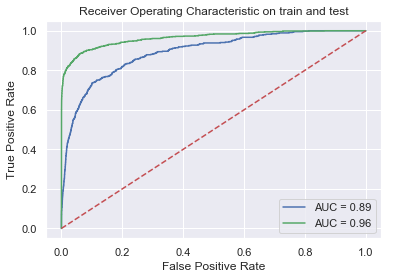

In [37]:
plt.title('Receiver Operating Characteristic on train and test')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'AUC = %0.2f' % roc_auc2)
#plt.plot(neighbors, auc1,'g')
#plt.plot(neighbors, auc2,'r')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#  SMOTE 

In [4]:
df_tr=pd.read_csv('train.csv')
yees=df_tr['target']
df_tr_after_drop=df_tr.drop(['target'],axis=1)
#spilliting data 


# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(df_tr_after_drop, yees, test_size=0.3, random_state=42,stratify=yees)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)

X_tr.fillna(X_tr.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
X_cv.fillna(X_cv.mean(), inplace=True)


sm = SMOTE(random_state=27, ratio=1.0)

X_tr, y_tr = sm.fit_sample(X_tr, y_tr)

sc = StandardScaler(with_mean=True)
Xbow_tr_std = sc.fit_transform(X_tr)
Xbow_test_std = sc.transform(X_test)
Xbow_cv_std = sc.transform(X_cv)

### HYPER_PARAMETER TUNING WITH DEPTH AND NO.OF ESTIMATERS OF DECISION TREE:

In [5]:
#code for hyperparameter tuning
import numpy as np
hyper1 =  [5, 10, 50, 100, 200,400, 600, 800]
hyper2 =  [2, 4, 6, 8, 10, 12, 14, 16, 18]

auc1=np.empty((8,9))
auc2=np.empty((8,9))
l=0
for j in hyper1:
    m=0
    for k in hyper2:
        
        model = RandomForestClassifier(n_estimators=j,max_depth=k)
        model.fit(Xbow_tr_std, y_tr)
    
        probs = model.predict_proba(Xbow_tr_std)
        preds = probs[:,1]
        roc_auc1=metrics.roc_auc_score(y_tr, preds)
        auc1[l][m]=(roc_auc1)
    
  
        probs = model.predict_proba(Xbow_cv_std)
        preds = probs[:,1]
        roc_auc2=metrics.roc_auc_score(y_cv, preds)
        auc2[l][m]=(roc_auc2)
        m=m+1
        
    l=l+1

# PLOTTING SEABORN HEATMAP:

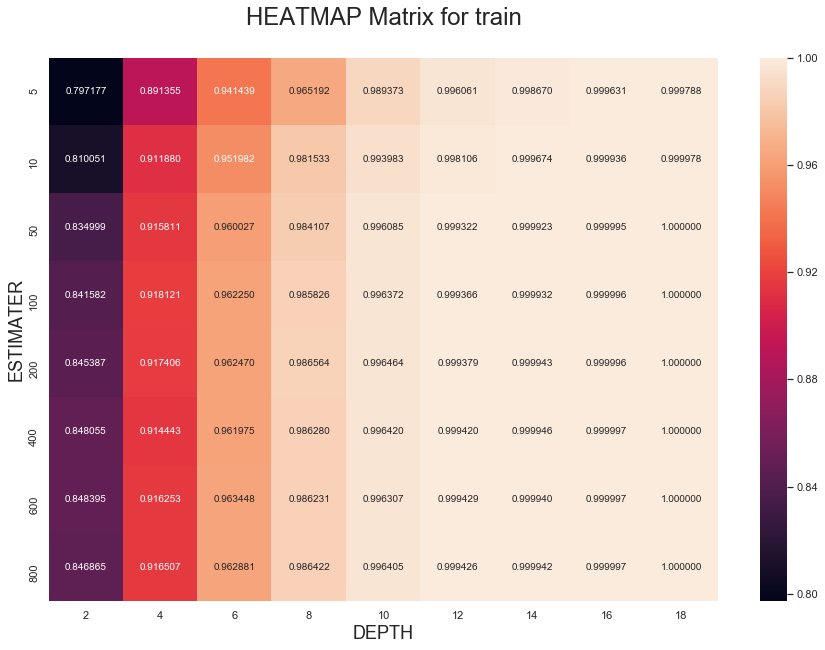

In [6]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc1, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for train\n",size=24)
plt.show()

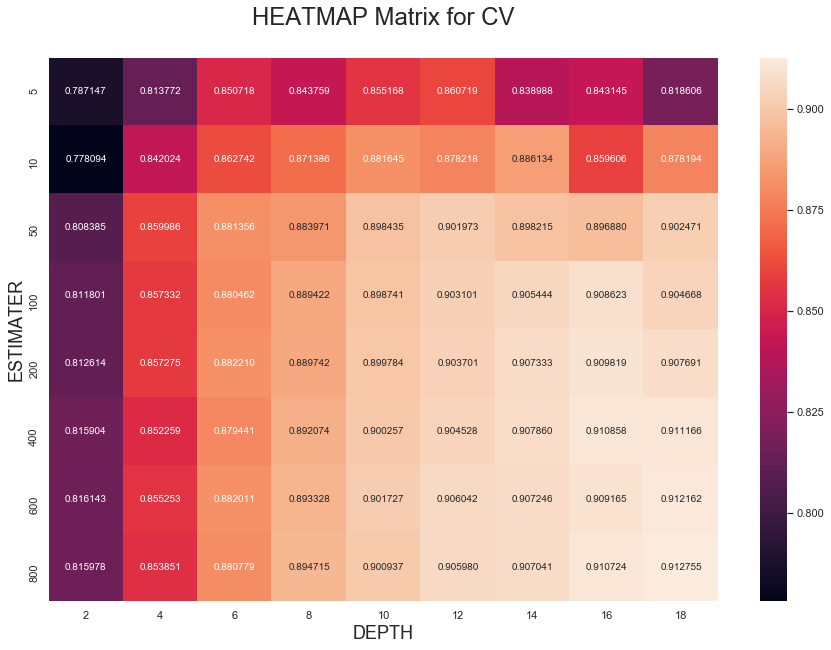

In [7]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc2, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for CV\n",size=24)
plt.show()

# FITTING AND TESTING MODEL ON OUR SPLITTED TEST DATA:

In [8]:
rf = RandomForestClassifier(n_estimators=50,max_depth=10)

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred = rf.predict(Xbow_test_std)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100

precision_score1=precision_score(y_test, pred )

recall_score1=recall_score(y_test, pred )

print('\nThe accuracy of the Random forest classifier for n_estimaters=%f and Depth = %f is %f%%' % (50,10, acc))


f1 = f1_score(y_test, pred)
print('\nThe precision_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (50,10,precision_score1))

print('\nThe recall_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (50,10,recall_score1))

print('\nThe f1_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (50,10,f1))



The accuracy of the Random forest classifier for n_estimaters=50.000000 and Depth = 10.000000 is 90.602025%

The precision_score of the  Random forest classifier  for n_estimaters=50 and Depth = 10 is 0.290323

The recall_score of the  Random forest classifier  for n_estimaters=50 and Depth = 10 is 0.655629

The f1_score of the  Random forest classifier  for n_estimaters=50 and Depth = 10 is 0.402439


# PLOTTING CONFUSION MATRIX:

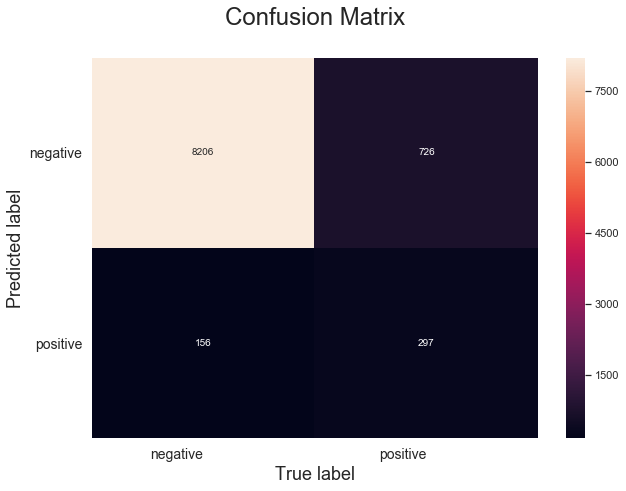

In [9]:
# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=18)
plt.xlabel('True label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

# PLOTTING AUC_ROC CURVE FOR TRAIN AND TEST DATA:

In [10]:
rf.fit(Xbow_tr_std, y_tr)
probs2 = rf.predict_proba(Xbow_tr_std)
preds2 = probs2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_tr, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)


probs1 = rf.predict_proba(Xbow_test_std)
preds1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

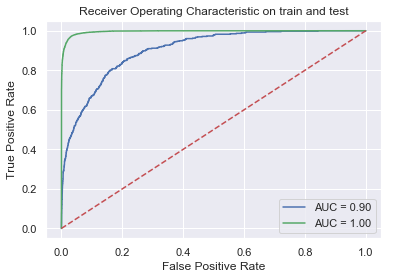

In [11]:
plt.title('Receiver Operating Characteristic on train and test')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'AUC = %0.2f' % roc_auc2)
#plt.plot(neighbors, auc1,'g')
#plt.plot(neighbors, auc2,'r')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# HYPERPARAMETER TUNING WITH DEPTH AND NO.OF ESTIMATERS for XGBClassifier

In [12]:
#code for hyperparameter tuning
import numpy as np
hyper1 =  [5, 10, 50, 100, 200,400, 600, 800]
hyper2 =  [2, 4, 6, 8, 10, 12, 14, 16, 18]

auc1=np.empty((8,9))
auc2=np.empty((8,9))

l=0
for j in hyper1:
    m=0
    for k in hyper2:
        
        model = XGBClassifier(n_estimators=j,max_depth=k)
        model.fit(Xbow_tr_std, y_tr)
    
        probs = model.predict_proba(Xbow_tr_std)
        preds = probs[:,1]
        roc_auc1=metrics.roc_auc_score(y_tr, preds)
        auc1[l][m]=(roc_auc1)
    
  
        probs = model.predict_proba(Xbow_cv_std)
        preds = probs[:,1]
        roc_auc2=metrics.roc_auc_score(y_cv, preds)
        auc2[l][m]=(roc_auc2)
        m=m+1
        
    l=l+1

# PLOTTING SEABORN HEATMAP:

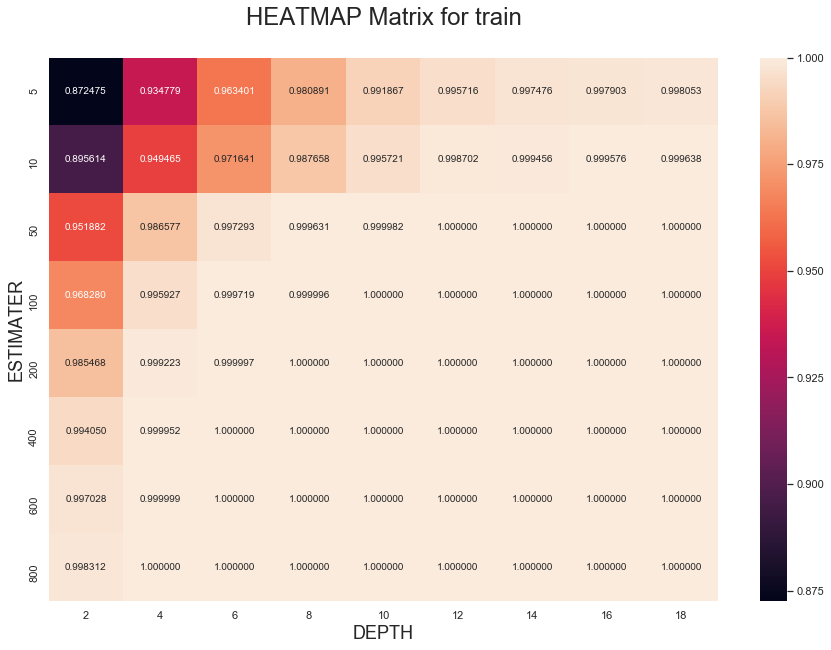

In [13]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc1, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for train\n",size=24)
plt.show()

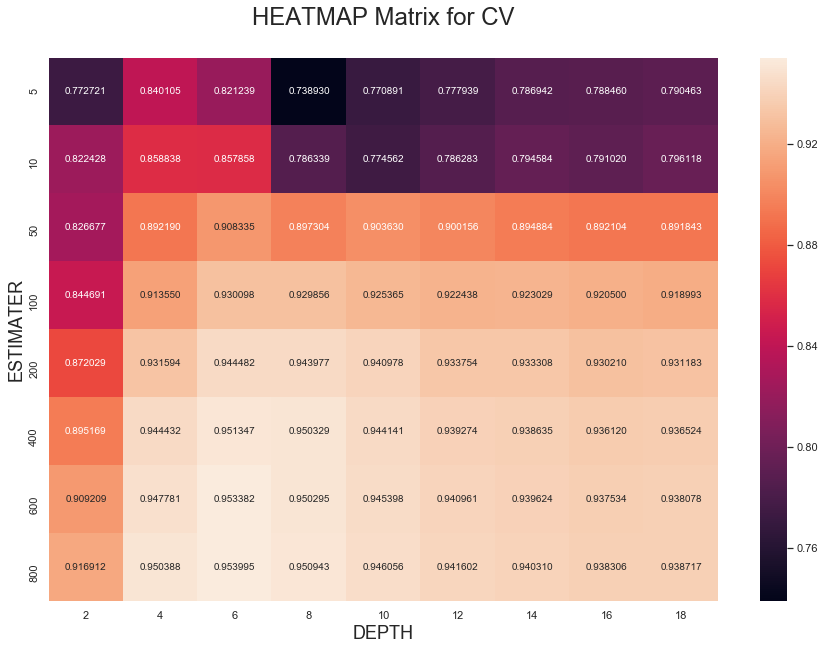

In [14]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc2, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for CV\n",size=24)
plt.show()

# FITTING AND TESTING MODEL ON OUR SPLITTED TEST DATA:

In [15]:
rf = RandomForestClassifier(n_estimators=100,max_depth=8)

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred = rf.predict(Xbow_test_std)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100

precision_score1=precision_score(y_test, pred )

recall_score1=recall_score(y_test, pred )

f1 = f1_score(y_test, pred)

print('\nThe accuracy of the Random forest classifier for n_estimaters=%f and Depth = %f is %f%%' % (100,8, acc))



print('\nThe precision_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (100,8,precision_score1))

print('\nThe recall_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (100,8,recall_score1))

print('\nThe f1_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (100,8,f1))



The accuracy of the Random forest classifier for n_estimaters=100.000000 and Depth = 8.000000 is 88.609483%

The precision_score of the  Random forest classifier  for n_estimaters=100 and Depth = 8 is 0.248366

The recall_score of the  Random forest classifier  for n_estimaters=100 and Depth = 8 is 0.671082

The f1_score of the  Random forest classifier  for n_estimaters=100 and Depth = 8 is 0.362552


# PLOTTING CONFUSION MATRIX:

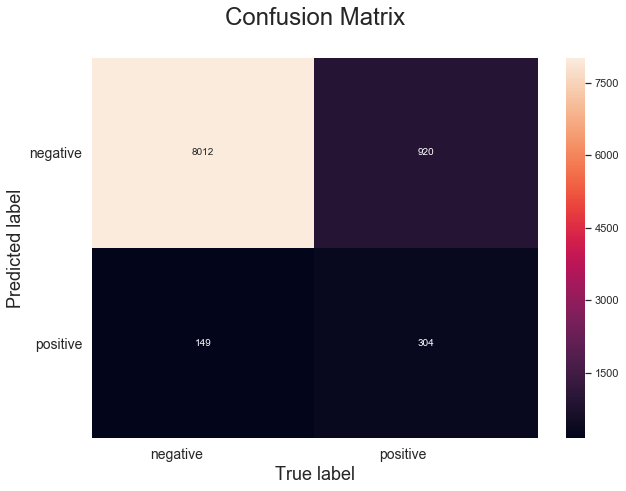

In [16]:
# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=18)
plt.xlabel('True label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

# PLOTTING AUC_ROC CURVE FOR TRAIN AND TEST DATA:

In [17]:
rf.fit(Xbow_tr_std, y_tr)
probs2 = rf.predict_proba(Xbow_tr_std)
preds2 = probs2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_tr, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)


probs1 = rf.predict_proba(Xbow_test_std)
preds1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

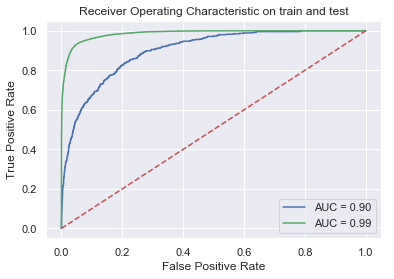

In [18]:
plt.title('Receiver Operating Characteristic on train and test')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'AUC = %0.2f' % roc_auc2)
#plt.plot(neighbors, auc1,'g')
#plt.plot(neighbors, auc2,'r')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# UP-SAMPLING TECHNIQUE:

In [19]:
#spilliting data 


from sklearn.model_selection import train_test_split

# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(df_tr_after_drop, yees, test_size=0.3, random_state=42,stratify=yees)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)



In [20]:
y_tr = pd.DataFrame(y_tr)
X_tr = pd.DataFrame(X_tr)
X_tr['target']=y_tr['target']
X_tr.head(2)

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
13653,13654,-0.317430,0.76524,0.044714,1.1245,-3.4901,-1.903000,-0.31743,0.30678,0.65492,...,-0.433620,-1.35220,1.4420,1.628000,12.6090,1.9033,200.230,1.8229,1.0988,0
23002,23003,0.076737,0.26259,0.448000,3.0413,54.0490,0.076737,0.09711,2.51650,1.06080,...,0.057304,0.11613,0.9427,0.065258,8.3549,9.5313,46.322,7.8797,5.2006,0


<class 'pandas.core.frame.DataFrame'>
14569 759
14569 759
Random over-sampling:
1    14569
0    14569
Name: target, dtype: int64


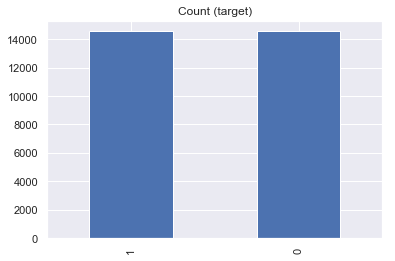

In [21]:
# Class count
X_tr = pd.DataFrame(X_tr)
print(type(X_tr))
count_class_0, count_class_1 = X_tr.target.value_counts()
print(count_class_0, count_class_1)

# Divide by class
df_class_0 = X_tr[X_tr.target == 0]
df_class_1 = X_tr[X_tr.target == 1]
print(count_class_0, count_class_1)


df_class_1_over = df_class_1.sample(count_class_0, replace=True)
X_tr = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(X_tr.target.value_counts())

X_tr.target.value_counts().plot(kind='bar', title='Count (target)');

In [22]:
y_tr=X_tr['target']
X_tr=X_tr.drop(['target'],axis=1)

In [23]:
X_tr.fillna(X_tr.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
X_cv.fillna(X_cv.mean(), inplace=True)


sc = StandardScaler(with_mean=True)
Xbow_tr_std = sc.fit_transform(X_tr)
Xbow_test_std = sc.transform(X_test)
Xbow_cv_std = sc.transform(X_cv)



# HYPERPARAMETER TUNING WITH DEPTH AND NO.OF ESTIMATERS for XGBClassifier

In [24]:
#code for hyperparameter tuning
import numpy as np
hyper1 =  [5, 10, 50, 100, 200,400, 600, 800]
hyper2 =  [2, 4, 6, 8, 10, 12, 14, 16, 18]

auc1=np.empty((8,9))
auc2=np.empty((8,9))
l=0
for j in hyper1:
    m=0
    for k in hyper2:
        
        model = XGBClassifier(n_estimators=j,max_depth=k)
        model.fit(Xbow_tr_std, y_tr)
    
        probs = model.predict_proba(Xbow_tr_std)
        preds = probs[:,1]
        roc_auc1=metrics.roc_auc_score(y_tr, preds)
        auc1[l][m]=(roc_auc1)
    
  
        probs = model.predict_proba(Xbow_cv_std)
        preds = probs[:,1]
        roc_auc2=metrics.roc_auc_score(y_cv, preds)
        auc2[l][m]=(roc_auc2)
        m=m+1
        
    l=l+1

# PLOTTING SEABORN HEATMAP:

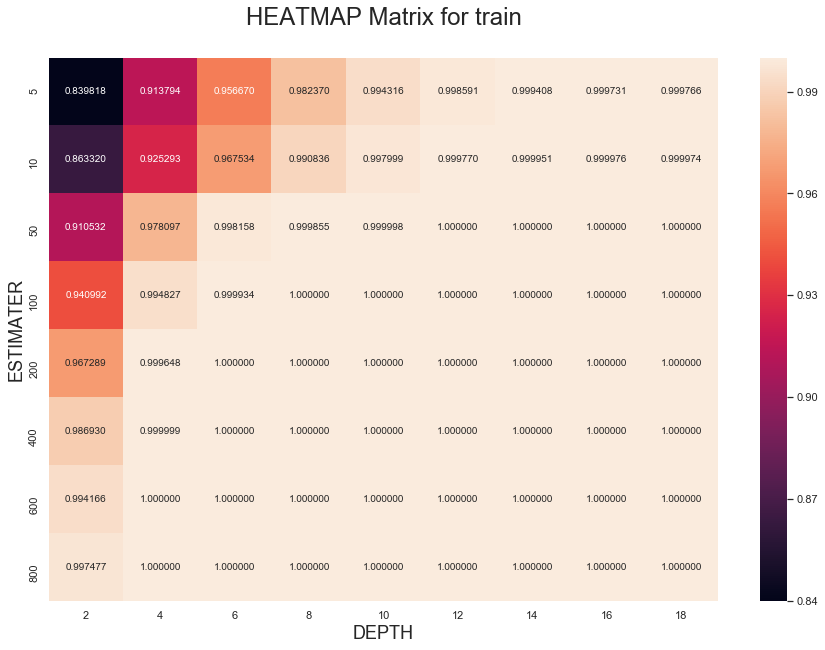

In [25]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc1, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for train\n",size=24)
plt.show()

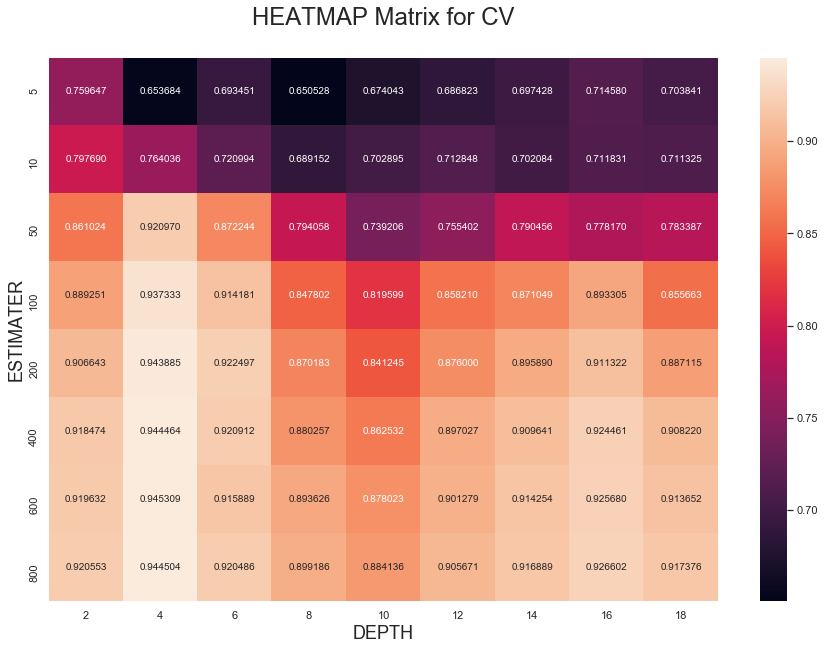

In [26]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc2, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for CV\n",size=24)
plt.show()

# FITTING AND TESTING MODEL ON OUR SPLITTED TEST DATA:

In [27]:
rf = RandomForestClassifier(n_estimators=100,max_depth=6)

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred = rf.predict(Xbow_test_std)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100

precision_score1=precision_score(y_test, pred )

recall_score1=recall_score(y_test, pred )

f1 = f1_score(y_test, pred)

print('\nThe accuracy of the Random forest classifier for n_estimaters=%f and Depth = %f is %f%%' % (100,6, acc))



print('\nThe precision_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (100,6,precision_score1))

print('\nThe recall_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (100,6,recall_score1))

print('\nThe f1_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (100,6,f1))



The accuracy of the Random forest classifier for n_estimaters=100.000000 and Depth = 6.000000 is 85.572722%

The precision_score of the  Random forest classifier  for n_estimaters=100 and Depth = 6 is 0.210289

The recall_score of the  Random forest classifier  for n_estimaters=100 and Depth = 6 is 0.721854

The f1_score of the  Random forest classifier  for n_estimaters=100 and Depth = 6 is 0.325697


# PLOTTING CONFUSION MATRIX:

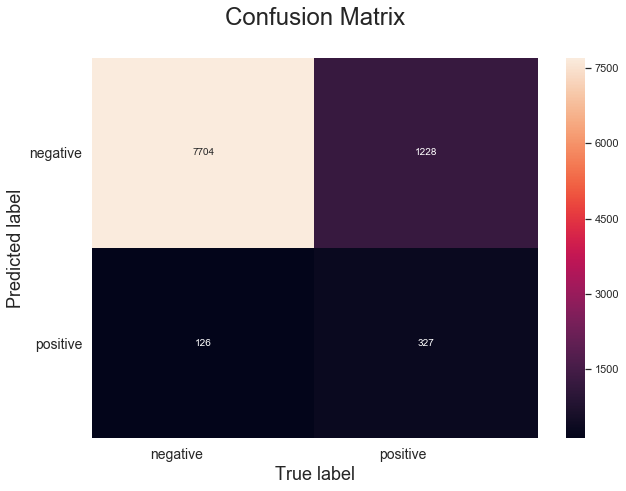

In [28]:
# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=18)
plt.xlabel('True label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

# PLOTTING AUC_ROC CURVE FOR TRAIN AND TEST DATA:

In [29]:
rf.fit(Xbow_tr_std, y_tr)
probs2 = rf.predict_proba(Xbow_tr_std)
preds2 = probs2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_tr, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)


probs1 = rf.predict_proba(Xbow_test_std)
preds1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

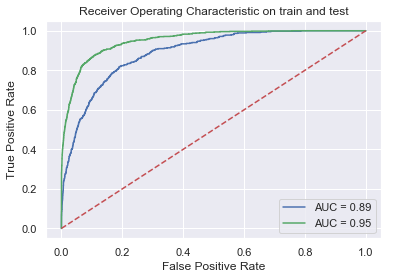

In [30]:
plt.title('Receiver Operating Characteristic on train and test')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'AUC = %0.2f' % roc_auc2)
#plt.plot(neighbors, auc1,'g')
#plt.plot(neighbors, auc2,'r')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# HYPERPARAMETER TUNING WITH DEPTH AND NO.OF ESTIMATERS for XGBClassifier

In [31]:
#code for hyperparameter tuning
import numpy as np
hyper1 =  [5, 10, 50, 100, 200,400, 600, 800]
hyper2 =  [2, 4, 6, 8, 10, 12, 14, 16, 18]

auc1=np.empty((8,9))
auc2=np.empty((8,9))
l=0
for j in hyper1:
    m=0
    for k in hyper2:
        
        model = XGBClassifier(n_estimators=j,max_depth=k)
        model.fit(Xbow_tr_std, y_tr)
    
        probs = model.predict_proba(Xbow_tr_std)
        preds = probs[:,1]
        roc_auc1=metrics.roc_auc_score(y_tr, preds)
        auc1[l][m]=(roc_auc1)
    
  
        probs = model.predict_proba(Xbow_cv_std)
        preds = probs[:,1]
        roc_auc2=metrics.roc_auc_score(y_cv, preds)
        auc2[l][m]=(roc_auc2)
        m=m+1
        
    l=l+1

# PLOTTING SEABORN HEATMAP:

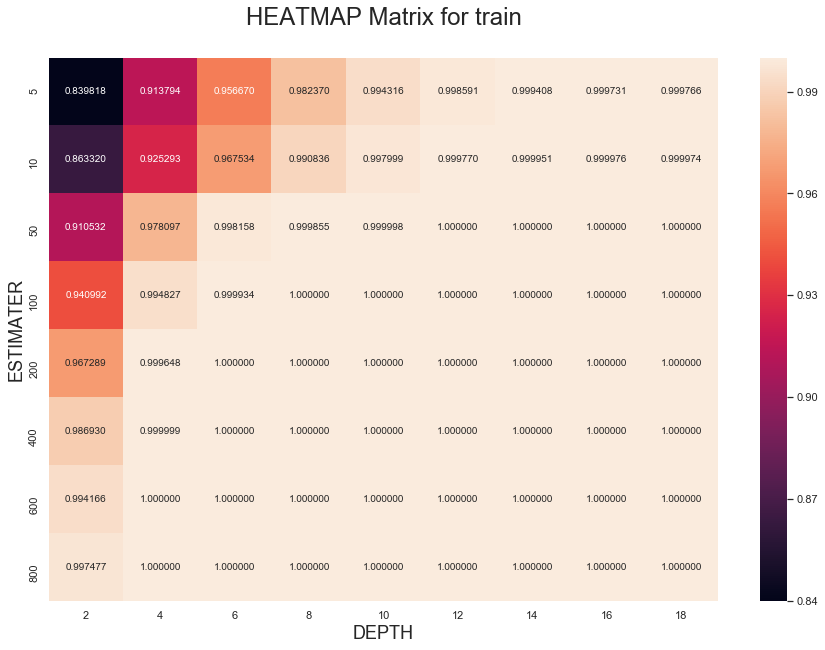

In [32]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc1, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for train\n",size=24)
plt.show()

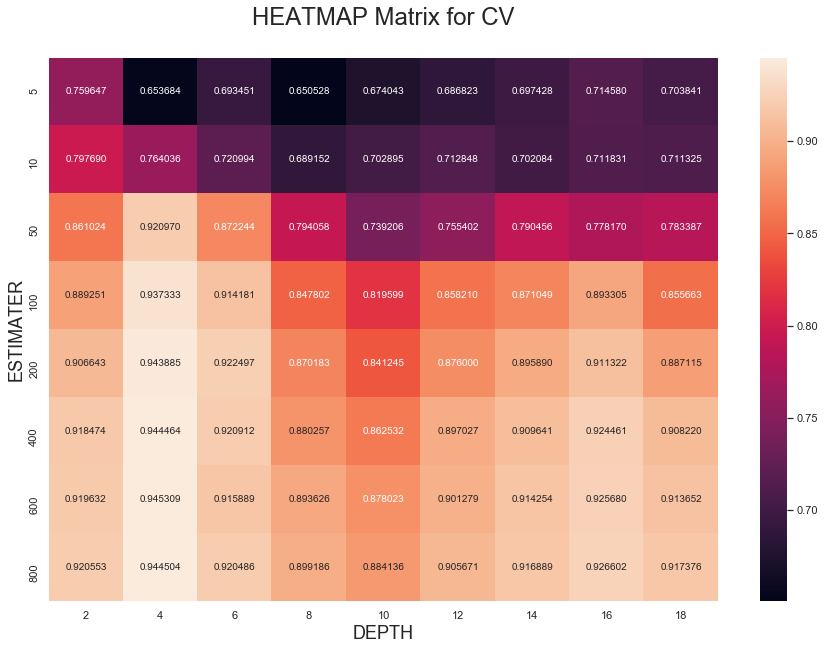

In [33]:
# Code for drawing seaborn heatmaps

df_heatmap =pd.DataFrame(auc2, hyper1, hyper2 )
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df_heatmap, annot=True, fmt="f")

plt.ylabel('ESTIMATER',size=18)
plt.xlabel('DEPTH',size=18)
plt.title("HEATMAP Matrix for CV\n",size=24)
plt.show()

# FITTING AND TESTING MODEL ON OUR SPLITTED TEST DATA:

In [39]:
rf = RandomForestClassifier(n_estimators=100,max_depth=6)

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred = rf.predict(Xbow_test_std)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100

precision_score1=precision_score(y_test, pred )

recall_score1=recall_score(y_test, pred )

f1 = f1_score(y_test, pred)

print('\nThe accuracy of the Random forest classifier for n_estimaters=%f and Depth = %f is %f%%' % (100,6, acc))



print('\nThe precision_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (100,6,precision_score1))

print('\nThe recall_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (100,6,recall_score1))

print('\nThe f1_score of the  Random forest classifier  for n_estimaters=%d and Depth = %d is %f' % (100,6,f1))



The accuracy of the Random forest classifier for n_estimaters=100.000000 and Depth = 6.000000 is 86.638253%

The precision_score of the  Random forest classifier  for n_estimaters=100 and Depth = 6 is 0.222453

The recall_score of the  Random forest classifier  for n_estimaters=100 and Depth = 6 is 0.708609

The f1_score of the  Random forest classifier  for n_estimaters=100 and Depth = 6 is 0.338608


# PLOTTING CONFUSION MATRIX:

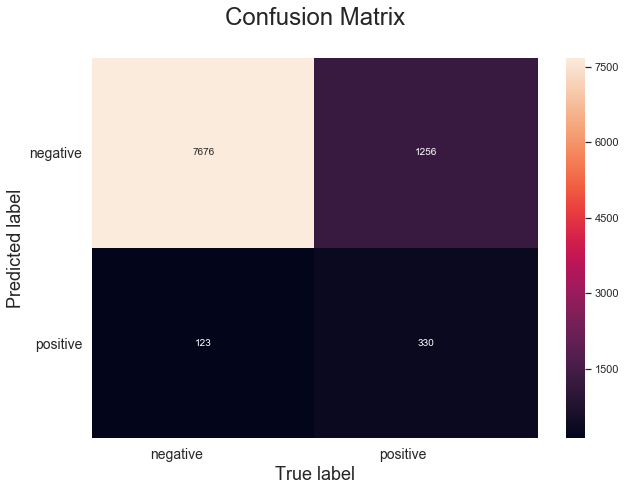

In [35]:
# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=18)
plt.xlabel('True label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

# PLOTTING AUC_ROC CURVE FOR TRAIN AND TEST DATA:

In [36]:
rf.fit(Xbow_tr_std, y_tr)
probs2 = rf.predict_proba(Xbow_tr_std)
preds2 = probs2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_tr, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)


probs1 = rf.predict_proba(Xbow_test_std)
preds1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

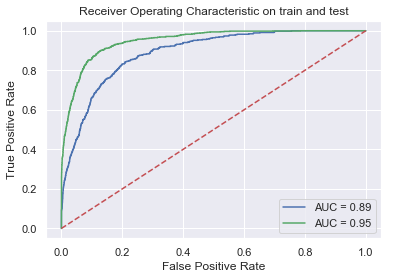

In [37]:
plt.title('Receiver Operating Characteristic on train and test')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'AUC = %0.2f' % roc_auc2)
#plt.plot(neighbors, auc1,'g')
#plt.plot(neighbors, auc2,'r')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# PREETY_TABLE_OBSERVATION:

In [40]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Technique", "Model","DEPTH","ESTIMATER", "Precession","recall","F1","ACCURACY"]

x.add_row(["No_Sampling", "Decision Tree",     8,    50,     1.000000,    0.022075,     0.043197,   95.279702])

x.add_row(["No_Sampling", "XGB_Regressor",     8,    50,     0.950000 ,   0.041943 ,    0.080338,   95.364944])

x.add_row(["SMOTE", "Decision Tree",           10,   50,     0.290323,    0.655629 ,    0.402439,   90.602025])
   
x.add_row(["SMOTE", "XGB_Regressor",           8,    100,    0.248366,    0.671082  ,   0.362552,   88.609483])

x.add_row(["UP_SAMPLING", "Decision Tree",     6,   100,    0.210289,    0.721854  ,   0.325697,   85.572722])

x.add_row(["UP_SAMPLING", "XGB_Regressor",      8,   100,    0.208071,    0.728477  ,   0.323688,  85.306340])


print(x)

+-------------+---------------+-------+-----------+------------+----------+----------+-----------+
|  Technique  |     Model     | DEPTH | ESTIMATER | Precession |  recall  |    F1    |  ACCURACY |
+-------------+---------------+-------+-----------+------------+----------+----------+-----------+
| No_Sampling | Decision Tree |   8   |     50    |    1.0     | 0.022075 | 0.043197 | 95.279702 |
| No_Sampling | XGB_Regressor |   8   |     50    |    0.95    | 0.041943 | 0.080338 | 95.364944 |
|    SMOTE    | Decision Tree |   10  |     50    |  0.290323  | 0.655629 | 0.402439 | 90.602025 |
|    SMOTE    | XGB_Regressor |   8   |    100    |  0.248366  | 0.671082 | 0.362552 | 88.609483 |
| UP_SAMPLING | Decision Tree |   6   |    100    |  0.210289  | 0.721854 | 0.325697 | 85.572722 |
| UP_SAMPLING | XGB_Regressor |   8   |    100    |  0.208071  | 0.728477 | 0.323688 |  85.30634 |
+-------------+---------------+-------+-----------+------------+----------+----------+-----------+


# ---------------------SAVING_RESULT_WITHOUT_SAMPLING-----------------------

In [170]:
df_tr1=pd.read_csv('train.csv')
df_te1=pd.read_csv('test.csv')
yees=df_tr['target']
df_tr_after_drop=df_tr.drop(['target'],axis=1)



In [171]:
df_tr_after_drop.fillna(df_tr_after_drop.mean(), inplace=True)
df_te1.fillna(df_te1.mean(), inplace=True)


Xbow_tr_std = sc.fit_transform(df_tr_after_drop)
Xbow_test_std = sc.transform(df_te1)



In [173]:
rf = XGBClassifier(n_estimators=150,max_depth=10)

# fitting the model
rf.fit(Xbow_tr_std, yees)

# predict the response
pred = rf.predict(Xbow_test_std)

In [174]:
df_te['TARGET'] = pred
df_te.to_csv('test_with_target_finel1.csv', index=True)

# ------------------------------SAVING_RESULT_WITH_SMOTE------------------------------

In [175]:
X_tr, y_tr = sm.fit_sample(df_tr_after_drop, yees)
Xbow_tr_std = sc.fit_transform(X_tr)


In [176]:
rf = XGBClassifier(n_estimators=150,max_depth=10)

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred = rf.predict(Xbow_test_std)

In [177]:
df_te['TARGET'] = pred
df_te.to_csv('test_with_target_finel2.csv', index=True)

# ------SAVING_RESULT_WITH_OVERSAMPLING_MINORITY_CLASS---------

<class 'pandas.core.frame.DataFrame'>
29772 1511
29772 1511
Random over-sampling:
1    29772
0    29772
Name: target, dtype: int64


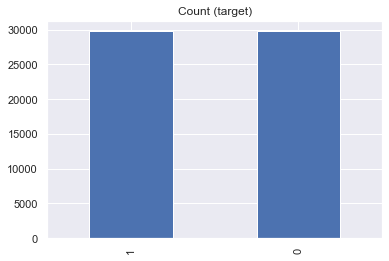

In [178]:
# Class count
X_tr = pd.DataFrame(df_tr1)
print(type(X_tr))
count_class_0, count_class_1 = X_tr.target.value_counts()
print(count_class_0, count_class_1)

# Divide by class
df_class_0 = X_tr[X_tr.target == 0]
df_class_1 = X_tr[X_tr.target == 1]
print(count_class_0, count_class_1)


df_class_1_over = df_class_1.sample(count_class_0, replace=True)
X_tr = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(X_tr.target.value_counts())

X_tr.target.value_counts().plot(kind='bar', title='Count (target)');



In [179]:
y_tr=X_tr['target']
X_tr=X_tr.drop(['target'],axis=1)

In [180]:
X_tr.fillna(X_tr.mean(), inplace=True)

Xbow_tr_std = sc.fit_transform(X_tr)

In [181]:
rf = XGBClassifier(n_estimators=100,max_depth=8)

# fitting the model
rf.fit(Xbow_tr_std, y_tr)

# predict the response
pred = rf.predict(Xbow_test_std)

In [182]:
df_te['TARGET'] = pred
df_te.to_csv('test_with_target_finel3.csv', index=True)